<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2014400051**
- **Student ID2:** **2018400291**
- **Student ID3:** **2019705072**

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

In [1]:
#Import required libraries

import scipy.io as spio  
import numpy as np
import matplotlib.pyplot as plt

#K-Means Data
data = np.load('./kmeans_data/data.npy')
labels = np.load('./kmeans_data/label.npy')

#PCA Data
dic = spio.loadmat("USPS.mat")
X = dic['A']

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

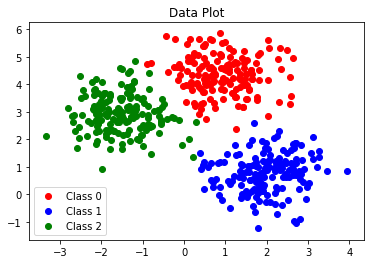

In [2]:
#grouping data points according to their labels
Class_0 = data[labels == 0]
Class_1 = data[labels == 1]
Class_2 = data[labels == 2]

#scattering data points , label 0 -> red , label 1 -> blue , label 2 -> green
plt.scatter(Class_0[:,0],Class_0[:,1], c='red', label='Class 0')
plt.scatter(Class_1[:,0],Class_1[:,1], c='blue', label='Class 1')
plt.scatter(Class_2[:,0],Class_2[:,1], c='green', label='Class 2')
plt.title('Data Plot')
plt.legend(loc='lower left')
plt.show()

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [3]:
#class k_means
class k_means:
    def __init__(self, data, k, max_iter):
        self.k = k #number of clusters
        self.max_iter = max_iter #number of iterations
        self.data = data #dataset
        
    def fit(self):
        
        np.random.seed(1) # set seed for random state
        #setting initial centroids
        #getting k random integers between 0 and number of rows of data set then selecting rows from dataset via using these integers as row indexes
        slct = np.random.randint(len(self.data), size=self.k)
        self.centroids = self.data[slct]

        #iterate max_iter times which is stopping condition
        for i in range(self.max_iter):
            #declaring empty dictionary to keep clusters
            self.classifications = {}
            #initializing k dictionary elements as empty lists to keep k clusters
            for i in range(self.k):
                self.classifications[i] = []
            
            #for each data point in data set,
            #calculating Euclidean distance between data point and centroids then assigning data point to closest centroid
            #recomputing centroid of each cluster via calculating mean of data points in the clusters
            for point in self.data:
                distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(point)
                
            for classification in self.classifications:
                self.centroids[classification] = np.mean(self.classifications[classification],axis=0)

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

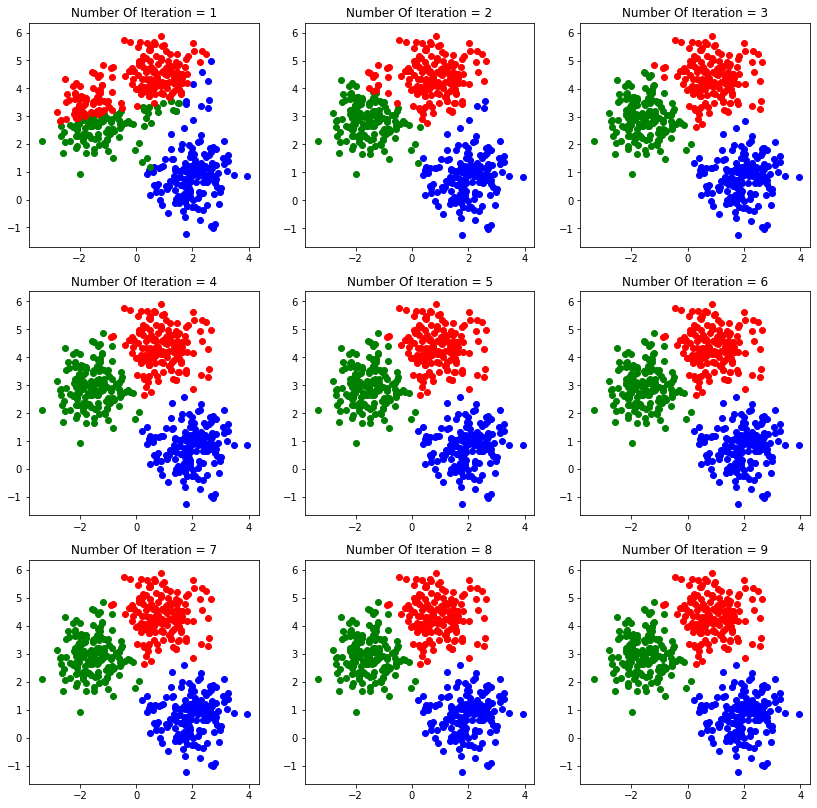

In [4]:
def helper(axes,i,j,N):
    global data
    #creating model object from k_means class, k=3 and N as max_iter
    model = k_means(data,3,N)
    #calling fit function of model object to get final clusters and centroids of model
    model.fit()
    
    #scattering clusters of model
    colors = ['blue','green','red']
    for classification in model.classifications:
        color = colors[classification]
        for point in model.classifications[classification]:
            axes[i,j].scatter(point[0],point[1],c=color)
    
    title = f"Number Of Iteration = {N}"
    axes[i,j].set_title(label=title)

#creating 3x3 subplot
f, axes = plt.subplots(3,3,figsize=(14,14))
#calling helper function with N=1, N=2, N=3, N=4,...., N=9
helper(axes,0,0,1)
helper(axes,0,1,2)
helper(axes,0,2,3)
helper(axes,1,0,4)
helper(axes,1,1,5)
helper(axes,1,2,6)
helper(axes,2,0,7)
helper(axes,2,1,8)
helper(axes,2,2,9)

### Convergence Point -> N=4

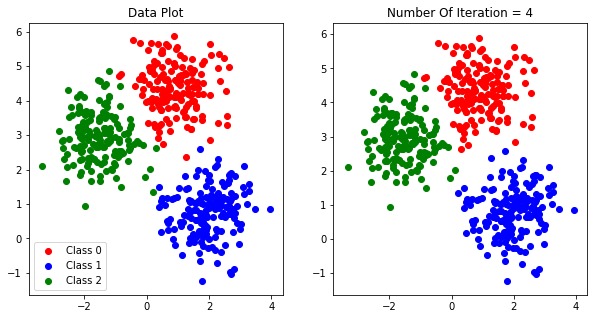

In [5]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

#grouping data points according to their labels
Class_0 = data[labels == 0]
Class_1 = data[labels == 1]
Class_2 = data[labels == 2]

#scattering data points , label 0 -> red , label 1 -> blue , label 2 -> green
ax1.scatter(Class_0[:,0],Class_0[:,1], c='red', label='Class 0')
ax1.scatter(Class_1[:,0],Class_1[:,1], c='blue', label='Class 1')
ax1.scatter(Class_2[:,0],Class_2[:,1], c='green', label='Class 2')
ax1.set_title('Data Plot')
ax1.legend(loc='lower left')

#creating model object from k_means class, k=3 and N=4 which is convergence point as max_iter
model = k_means(data,3,4)
#calling fit function of model object to get final clusters and centroids of model
model.fit()

#scattering clusters of model
ax2.set_title(label= "Number Of Iteration = 4")
colors = ['blue','green','red']
for classification in model.classifications:
    color = colors[classification]
    for point in model.classifications[classification]:
        ax2.scatter(point[0],point[1],c=color)

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [6]:
def PCA(X,d):
    
    def standardize(X): # subtracts sample mean from the input
        sample_mean = np.mean(X, axis=0)
        X = X-sample_mean
        return X

    def covariance(X): # calculated the covariance matrix of X
        n, m = X.shape # n and m are shapes of input X
        Xt = np.transpose(X) # Xt is transpose of X
        XtX = np.dot(Xt,X) # transpose(X) * X
        return XtX/n  # returns (256, 256) array

    X_standardize = standardize(X) # standardize input X 
    S = covariance(X_standardize) # find covariance matrix S of standardized input X

    eigenValues, eigenVectors = np.linalg.eig(S) # calculate eigennvalues and eigenvectors of covariance matrix
    idx = eigenValues.argsort()[::-1]   # sort eigenvalues and eigenvectors
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    G = eigenVectors[:,:d] # choose first d eigenvectors from sorted list of eigenvectors
    PCs = np.matmul(X, G) # constructs Principal Components with d many eigenvectors, shape of PCs -> (3000,d)
    
    return G, PCs #returns linear transformation and Principal Components 

In [7]:
# calculates principal components and linear transformations of X with d = 50, 100, 200, 256
G_50, PCs_50 = PCA(X, 50)
G_100, PCs_100 = PCA(X, 100)
G_200, PCs_200 = PCA(X, 200)
G_256, PCs_256 = PCA(X, 256)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [8]:
'''
G * (G^T * X^T ) = G((XG)^T) is the “reconstructed data matrix” and the objective
minimizes reconstruction error.

Function gets G and PCs -> XG as parameters and returns G * (G^T * X^T)
Notice (G^T * X^T) = (XG)^T which is named as XGt

G is of (256, d) size and PCs is of (3000, d) size
where d is number of principal components:
XGt will be of (d, 3000) size
GGtXt will be of (256, 3000) size and it symbolizes reconstructed images each column of which is one image
'''
def reconstruction(G, PCs):
    XGt = np.transpose(PCs) # XGt is of (d, 3000) size 
    GGtXt = np.matmul(G, XGt) # GGtXt is of (256, 3000) size 
    return np.transpose(GGtXt) # (3000, 256)

reconstructed_50 = reconstruction(G_50, PCs_50) # reconstruct with 50 PCs
reconstructed_100 = reconstruction(G_100, PCs_100)  # reconstruct with 100 PCs
reconstructed_200 = reconstruction(G_200, PCs_200)  # reconstruct with 200 PCs
reconstructed_256 = reconstruction(G_256, PCs_256)  # reconstruct with 256 PCs

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

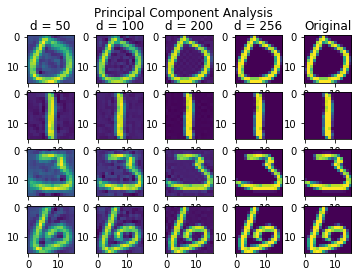

In [9]:
fig, axs = plt.subplots(4, 5) # Create 4x5 subplots each row represents one number and each column represents certain PCs.
fig.suptitle('Principal Component Analysis')
for i, index in enumerate([0, 500, 1000, 2000]): # Images at certain indices
    axs[i, 0].imshow(reconstructed_50[index].reshape((16,16))) # Select certain indexed image from reconstructed array with 50PCs
    axs[i, 1].imshow(reconstructed_100[index].reshape((16,16))) # Select certain indexed image from reconstructed array with 100PCs
    axs[i, 2].imshow(reconstructed_200[index].reshape((16,16))) # Select certain indexed image from reconstructed array with 200PCs
    axs[i, 3].imshow(reconstructed_256[index].reshape((16,16))) # Select certain indexed image from reconstructed array with 256PCs
    axs[i, 4].imshow(X[index].reshape((16,16)))
    if(i == 0): # Add titles
        axs[i, 0].set_title('d = 50')
        axs[i, 1].set_title('d = 100')
        axs[i, 2].set_title('d = 200')
        axs[i, 3].set_title('d = 256')
        axs[i, 4].set_title('Original')